### This notebook is produced for Coventry University's 7135CEM Coursework
Made by Sunggu Choi

The dataset is accessiable on https://www.kaggle.com/thoughtvector/customer-support-on-twitter

**Part 1 - Data Pre processing**

Identitfy the topic is positive or negitive, also predict how the answer would be.

1. Data Pre-processing
2. Visualisation - Dataset Invstigation
3. Topic Modelling - Investigate behavior
 - LDA and sentiment classification
 - LDA only
4. Visualisation

In [13]:
!pip3 install dill

     |████████████████████████████████| 81 kB 2.3 MB/s eta 0:00:011


In [ ]:
# import dill # Library for save jupyter lab session
# dill.dump_session('notebook_env.db')

In [16]:
# Install required packages
# !pip3 install nltk

     |████████████████████████████████| 1.5 MB 7.5 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 1.6 MB/s  eta 0:00:01
     |████████████████████████████████| 733 kB 51.0 MB/s eta 0:00:01


In [1]:
# Import requires libraries
import nltk
import pandas as pd

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm import tqdm_notebook
import seaborn
from datetime import datetime
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
# nltk.download('vader_lexicon')

In [3]:
# Load a dataset
original_dataset = pd.read_csv("./dataset/twcs.csv")

In [3]:
original_dataset

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0
...,...,...,...,...,...,...,...
2811769,2987947,sprintcare,False,Wed Nov 22 08:43:51 +0000 2017,"@823869 Hey, we'd be happy to look into this f...",NaN,2987948.0
2811770,2987948,823869,True,Wed Nov 22 08:35:16 +0000 2017,@115714 wtf!? I’ve been having really shitty s...,2987947,NaN
2811771,2812240,121673,True,Thu Nov 23 04:13:07 +0000 2017,@143549 @sprintcare You have to go to https://...,NaN,2812239.0
2811772,2987949,AldiUK,False,Wed Nov 22 08:31:24 +0000 2017,"@823870 Sounds delicious, Sarah! 😋 https://t.c...",NaN,2987950.0


As the data shown adove, the data is connected with tweet_id, response_tweet_id and in response_to_tweet_id

## Data processing and data investigation

In [4]:
original_dataset.isnull().sum()

tweet_id                         0
author_id                        0
inbound                          0
created_at                       0
text                             0
response_tweet_id          1040629
in_response_to_tweet_id     794335
dtype: int64

In [4]:
modified_ds = original_dataset.drop(['tweet_id','inbound','created_at','response_tweet_id','in_response_to_tweet_id'], axis=1)

In [5]:
modified_ds

,author_id,text
0,sprintcare,@115712 I understand. I would like to assist y...
1,115712,@sprintcare and how do you propose we do that
2,115712,@sprintcare I have sent several private messag...
3,sprintcare,@115712 Please send us a Private Message so th...
4,115712,@sprintcare I did.
...,...,...
2811769,sprintcare,"@823869 Hey, we'd be happy to look into this f..."
2811770,823869,@115714 wtf!? I’ve been having really shitty s...
2811771,121673,@143549 @sprintcare You have to go to https://...
2811772,AldiUK,"@823870 Sounds delicious, Sarah! 😋 https://t.c..."


In [5]:
modified_ds.to_csv('modified_ds.csv', index=False)  

## 2. Normalisation
 1. Set all characters to lowercaseSet all characters to lowercase
 3. Remove special characters
 4. Tokenisation
 5. Remove Stop words
 6. Stemming

### 2.1 Set all characters to lowercase

In [4]:
modified_ds_text = modified_ds['text'].str.lower()

In [53]:
lowercased = pd.DataFrame(modified_ds_text)
lowercased

,text
0,@115712 i understand. i would like to assist y...
1,@sprintcare and how do you propose we do that
2,@sprintcare i have sent several private messag...
3,@115712 please send us a private message so th...
4,@sprintcare i did.
...,...
2811769,"@823869 hey, we'd be happy to look into this f..."
2811770,@115714 wtf!? i’ve been having really shitty s...
2811771,@143549 @sprintcare you have to go to https://...
2811772,"@823870 sounds delicious, sarah! 😋 https://t.c..."


### 2.2 Remove special characters

In [86]:
df_without_special_char = lowercased.replace("[!,*)@#:/%(&$_?.^]+", " ", regex = True)

In [93]:
df_without_special_char

,text
0,115712 i understand i would like to assist y...
1,sprintcare and how do you propose we do that
2,sprintcare i have sent several private messag...
3,115712 please send us a private message so th...
4,sprintcare i did
...,...
2811769,823869 hey we'd be happy to look into this f...
2811770,115714 wtf i’ve been having really shitty se...
2811771,143549 sprintcare you have to go to https t ...
2811772,823870 sounds delicious sarah 😋 https t co ...


### 2.3 Tokenisation

In [103]:
print(nltk.word_tokenize(tokenised_word['text']))

['@', 'sprintcare', 'and', 'how', 'do', 'you', 'propose', 'we', 'do', 'that']


In [94]:
tokenised = []

In [95]:
for i in range(len(df_without_special_char)):
    target = df_without_special_char.iloc[i]
    target_t = nltk.word_tokenize(target['text'])
    tokenised.append(target_t)

In [28]:
type(tokenised)

list

In [98]:
df_tokenised = pd.DataFrame({'text':tokenised})

In [104]:
df_tokenised

,text
0,"[115712, i, understand, i, would, like, to, as..."
1,"[sprintcare, and, how, do, you, propose, we, d..."
2,"[sprintcare, i, have, sent, several, private, ..."
3,"[115712, please, send, us, a, private, message..."
4,"[sprintcare, i, did]"
...,...
2811769,"[823869, hey, we, 'd, be, happy, to, look, int..."
2811770,"[115714, wtf, i, ’, ve, been, having, really, ..."
2811771,"[143549, sprintcare, you, have, to, go, to, ht..."
2811772,"[823870, sounds, delicious, sarah, 😋, https, t..."


In [109]:
df_tokenised.text[1]

['sprintcare', 'and', 'how', 'do', 'you', 'propose', 'we', 'do', 'that']

### 2.4 Remove stopwords

In [110]:
# import nltk stopword file
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
# print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/sunggu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/sunggu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [116]:
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))                  

df_without_stopword = df_tokenised['text'].apply(lambda x: [item for item in x if item not in stops])

In [130]:
df_without_stopword = df_without_stopword.to_frame()

In [131]:
df_without_stopword

,text
0,"[115712, understand, would, like, assist, woul..."
1,"[sprintcare, propose]"
2,"[sprintcare, sent, several, private, messages,..."
3,"[115712, please, send, us, private, message, a..."
4,[sprintcare]
...,...
2811769,"[823869, hey, 'd, happy, look, please, send, u..."
2811770,"[115714, wtf, ’, really, shitty, service, day,..."
2811771,"[143549, sprintcare, go, https, co, v2tmhetl7q..."
2811772,"[823870, sounds, delicious, sarah, 😋, https, c..."


### 2.5 Stemming

In [114]:
import pandas as pd
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [132]:
df_stemmed = df_without_stopword['text'].apply(lambda x: [stemmer.stem(y) for y in x])

In [135]:
df_processed = df_stemmed.to_frame()

In [138]:
df_processed.to_csv('processed.csv', index=False)  

In [66]:

# # Get customer requests and company responses 

# first_inbound = original_dataset[pd.isnull(tweets.in_response_to_tweet_id) & tweets.inbound]
# inbounds_and_outbounds = pd.merge(first_inbound, original_dataset, left_on='tweet_id', 
#                                   right_on='in_response_to_tweet_id')

# inbounds_and_outbounds = inbounds_and_outbounds[inbounds_and_outbounds.inbound_y ^ True]


In [17]:
# inbounds_and_outbounds

In [ ]:
gensimvis

### Create a wordcloud for data analysis

In [4]:
# Import the wordcloud library
from wordcloud import WordCloud

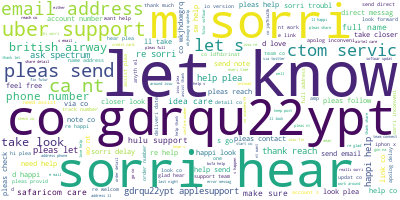

In [54]:
# Create a wordcloud


visualised = ','.join(list(df_dataset_processed2['text'].values))

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

wordcloud.generate(visualised)

wordcloud.to_image()

# Perform LDA Modelling (Unsupervised Learning)

In [11]:
# Vectorisation
# Change words into numerical form to extract information

# Bag of words is used 

import gensim
from gensim.utils import simple_preprocess

import gensim.corpora as corpora


# Get a list of word all the rows


In [ ]:
df_dataset_processed2["text"] = df_dataset_processed2["text"].map(lambda x: x.split(' '))

In [60]:
df_dataset_processed2

,text
0,"[, 115712, , , , , would, , like, , assist, , ..."
1,"[, sprintcar, , propos, ]"
2,"[, sprintcar, , sent, , sever, , privat, , mes..."
3,"[, 115712, , pleas, , send, , , , privat, , me..."
4,"[, sprintcar, ]"
...,...
2811769,"[, 823869, , hey, , d, , happi, , look, , plea..."
2811770,"[, 115714, , wtf, , ’, , realli, , shitti, , s..."
2811771,"[, 143549, , sprintcar, , go, , , , , co, , v2..."
2811772,"[, 823870, , sound, , delici, , sarah, , 😋, , ..."


In [9]:
# Create vectorlised words
dictionary = corpora.Dictionary(df_dataset_processed2["text"])

In [10]:
# Get 10000 most frequet words
dictionary.filter_extremes(no_below=1, no_above=1, keep_n=10000)

In [11]:
data = {}

In [26]:
df_dataset_processed2_bow = df_dataset_processed2["text"].map(dictionary.doc2bow)

NameError: name 'dictionary' is not defined

In [4]:
data_words = "".join(df_dataset_processed2.text)

In [ ]:
data_words

In [8]:
id2word = corpora.Dictionary(data_words)

TypeError: doc2bow expects an array of unicode tokens on input, not a single string

In [82]:
df_dataset_processed2

,text,bow
0,"[, 115712, , , , , would, , like, , assist, , ...","[(0, 15), (1, 2), (2, 1), (3, 1), (4, 1), (5, ..."
1,"[, sprintcar, , propos, ]","[(0, 3), (9, 1), (10, 1)]"
2,"[, sprintcar, , sent, , sever, , privat, , mes...","[(0, 9), (6, 1), (10, 1), (11, 1), (12, 1), (1..."
3,"[, 115712, , pleas, , send, , , , privat, , me...","[(0, 15), (1, 1), (6, 1), (11, 2), (17, 1), (1..."
4,"[, sprintcar, ]","[(0, 2), (10, 1)]"
...,...,...
2811769,"[, 823869, , hey, , d, , happi, , look, , plea...","[(0, 15), (1, 1), (11, 1), (18, 1), (20, 1), (..."
2811770,"[, 115714, , wtf, , ’, , realli, , shitti, , s...","[(0, 11), (2, 1), (23, 1), (28, 1), (46, 1), (..."
2811771,"[, 143549, , sprintcar, , go, , , , , co, , v2...","[(0, 24), (2, 1), (10, 1), (23, 1), (24, 1), (..."
2811772,"[, 823870, , sound, , delici, , sarah, , 😋, , ...","[(0, 11), (70, 1), (389, 1), (829, 1), (932, 1..."


In [4]:
print('Number of unique tokens: %d' % len(df_dataset_processed2['text']))
print('Number of documents: %d' % len(df_dataset_processed2['bow']))

Number of unique tokens: 2811774
Number of documents: 2811774


In [ ]:
df_dataset_processed2['bow'][0][:30]

In [2]:
df_dataset_processed2.to_csv('df_dataset_processed2.csv', index=False)  

NameError: name 'df_dataset_processed2' is not defined

In [3]:
df_dataset_processed2 = pd.read_csv("./df_dataset_processed2.csv")

In [12]:
df_dataset_processed2

,text,bow
0,"['', '115712', '', 'understand', '', 'would', ...","[(0, 13), (1, 2), (2, 1), (3, 1), (4, 1), (5, ..."
1,"['', 'sprintcar', '', 'propos', '']","[(0, 3), (10, 1), (11, 1)]"
2,"['', 'sprintcar', '', 'sent', '', 'sever', '',...","[(0, 9), (6, 1), (11, 1), (12, 1), (13, 1), (1..."
3,"['', '115712', '', 'pleas', '', 'send', '', 'u...","[(0, 14), (1, 1), (6, 1), (12, 2), (18, 1), (1..."
4,"['', 'sprintcar', '']","[(0, 2), (11, 1)]"
...,...,...
2811769,"['', '823869', '', 'hey', '', 'd', '', 'happi'...","[(0, 14), (1, 1), (12, 1), (19, 1), (21, 1), (..."
2811770,"['', '115714', '', 'wtf', '', '’', '', 'realli...","[(0, 11), (2, 1), (25, 1), (30, 1), (51, 1), (..."
2811771,"['', '143549', '', 'sprintcar', '', 'go', '', ...","[(0, 20), (2, 1), (11, 1), (25, 1), (26, 1), (..."
2811772,"['', '823870', '', 'sound', '', 'delici', '', ...","[(0, 9), (75, 1), (78, 1), (411, 1), (896, 1),..."


In [20]:
id2word


0          ['', '115712', '', 'understand', '', 'would', ...
1                        ['', 'sprintcar', '', 'propos', '']
2          ['', 'sprintcar', '', 'sent', '', 'sever', '',...
3          ['', '115712', '', 'pleas', '', 'send', '', 'u...
4                                      ['', 'sprintcar', '']
                                 ...                        
2811769    ['', '823869', '', 'hey', '', 'd', '', 'happi'...
2811770    ['', '115714', '', 'wtf', '', '’', '', 'realli...
2811771    ['', '143549', '', 'sprintcar', '', 'go', '', ...
2811772    ['', '823870', '', 'sound', '', 'delici', '', ...
2811773    ['', 'aldiuk', '', 'warm', '', 'sloe', '', 'gi...
Name: text, Length: 2811774, dtype: object

In [6]:
import re

def clean_text(text):
    """
    Applies some pre-processing on the given text.

    Steps :
    - Removing HTML tags
    - Removing punctuation
    - Lowering text
    """
    
    # remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # remove the characters [\], ['] and ["]
    text = re.sub(r"\\", "", text)    
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)    
    
    # convert text to lowercase
    text = text.strip().lower()
    
    # replace punctuation characters with spaces
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)

    return text

        
        
for i in range(len(df_dataset)):
    target = df_dataset.iloc[i]
    target_t = clean_text(target['text'])
    df_dataset_processed.append(target_t)

In [7]:
df_dataset_processed2 = pd.DataFrame(df_dataset_processed, columns=['text'])

In [53]:
df_dataset_processed2

,text
0,115712 would like assist would need ...
1,sprintcar propos
2,sprintcar sent sever privat messag one ...
3,115712 pleas send privat messag assist...
4,sprintcar
...,...
2811769,823869 hey d happi look pleas send d...
2811770,115714 wtf ’ realli shitti servic day ...
2811771,143549 sprintcar go co v2tmhetl7q ask...
2811772,823870 sound delici sarah 😋 co 7uqpw...
